In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#
import tensorflow as tf
#
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
#
#import torch
#from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, get_linear_schedule_with_warmup
#from transformers import AdamW
#from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
#
from tensorflow import random
from numpy.random import seed

seed_val = 1314
random.set_seed(seed_val)
seed(seed_val)

In [3]:
pd.set_option('display.max_colwidth', -1)

C:\Users\j\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [4]:
train = pd.read_csv('data/TIL_NLP_train_dataset.csv')
test = pd.read_csv('data/TIL_NLP_test_dataset.csv')

from sklearn.utils import shuffle
train = shuffle(train)

In [5]:
print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 1145 to 1861
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7380 non-null   int64 
 1   word_representation  7380 non-null   object
 2   outwear              7380 non-null   int64 
 3   top                  7380 non-null   int64 
 4   trousers             7380 non-null   int64 
 5   women dresses        7380 non-null   int64 
 6   women skirts         7380 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 461.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2460 non-null   int64 
 1   word_representation  2460 non-null   object
dtypes: int64(1), object(1)
memory usage: 38.6+ KB
None


In [6]:
train.head()

,id,word_representation,outwear,top,trousers,women dresses,women skirts
1145,1145,w173317 w39222 w207614 w553 w263923 w314686 w111248 w66980 w392147 w373260 w322219 w245476 w52265 w217871 w30555 w296675 w207614 w34893 w338587 w267311 w186076 w222433 w34893 w341569 w171999 w45374 w311583 w89538 w188962 w108000 w286596 w12685,1,0,1,0,0
6967,6967,w373517 w383437 w34893 w87179 w289496 w27013 w286596 w175602 w118125 w120979 w290531 w311583 w81365 w6645 w241910 w369266 w62255,0,1,1,0,0
7287,7287,w237465 w256553 w37419 w286461 w34893 w197783 w261297 w386149 w333524 w280823 w221983 w253354 w311583 w89538 w217871 w223408 w301497 w340315 w217871 w181937 w22890 w166896 w1867 w120979,0,1,0,0,1
4832,4832,w320917 w70856 w354002 w239661 w70440 w48576 w85032 w155034 w311583 w265585 w253180 w302064 w256214 w384021 w138132 w336335,1,0,1,0,0
1187,1187,w158995 w241780 w332305 w127737 w34893 w283447 w12622 w286596 w62255 w86171 w193067 w19617 w186076 w34893 w309676 w309016 w111939 w105773 w194870,1,0,1,0,0


In [7]:
test.head()

,id,word_representation
0,0,w373517 w383437 w374393 w87179 w289496 w327385 w388432 w115724 w36882 w290531 w311583 w7718 w49235 w193067
1,1,w237465 w167111 w279437 w194870 w351537 w175602 w209059 w118125 w120979 w150520 w59496 w34893 w189307 w144920 w187552 w239430 w162756 w255783 w342007
2,2,w151648 w93366 w121255 w193800 w71240 w48576 w309353 w399113 w34893 w500013 w135431 w238625 w115724 w314686 w248379 w395589 w256897 w500012 w168417 w366647
3,3,w182664 w317736 w33852 w111248 w45374 w209361 w97882 w1867 w120979 w66980 w373517 w500070 w217871 w195317 w95358 w186076 w39222 w381413 w186076 w185000 w372126 w19054 w234583 w85858 w241910
4,4,w206647 w236725 w99560 w338476 w75409 w36882 w204762 w101681 w203093 w162025 w371640 w391937 w371076 w186076 w84933 w35857 w303336 w7718 w373782 w47554 w332345


In [8]:
train_samples = train["word_representation"].values
train_labels = train[["outwear", "top", "trousers", "women dresses", "women skirts"]].values

In [9]:
test_samples = test["word_representation"].values

In [10]:
train_labels

array([[1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

# Short EDA

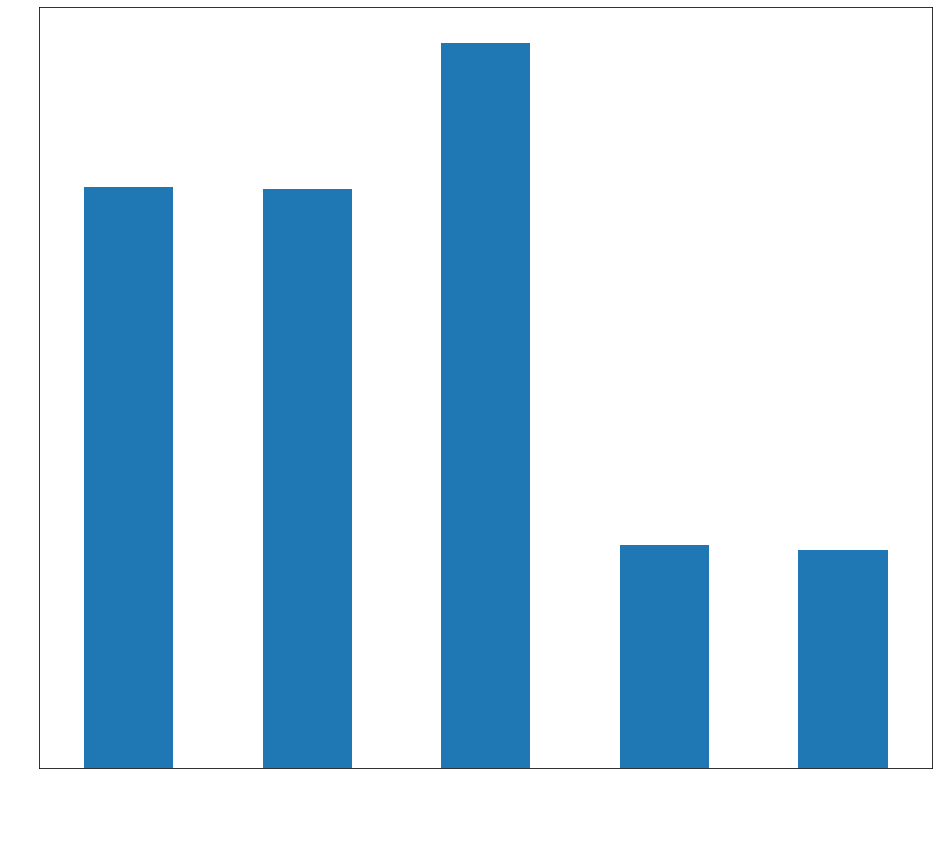

In [11]:
labels = train[["outwear", "top", "trousers", "women dresses", "women skirts"]]

f_size = plt.rcParams["figure.figsize"]
f_size[0] = 16
f_size[1] = 14
plt.rcParams["figure.figsize"] = f_size
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

labels.sum(axis=0).plot.bar()

In [12]:
from sklearn.model_selection import train_test_split

# Tokenize training data

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 20000

x_train, x_test, y_train, y_test = train_test_split(train_samples, train_labels, test_size=0.2)

print('Processing text dataset')

# Tokenize
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index) +1
print("Vocab Size: ", vocab_size)

# Sequence
tr_sequences = tokenizer.texts_to_sequences(x_train)

# Padding
# Find out whats the max length first
viewdf = train
viewdf['word_count'] = viewdf['word_representation'].str.split().str.len()
maxwords = viewdf['word_count'].max()
print(maxwords)
maxwords = 150
print(maxwords)

tr_data = pad_sequences(tr_sequences, maxlen=maxwords, padding='post')


Using TensorFlow backend.


Processing text dataset
Vocab Size:  3982
47
150


In [50]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=maxwords, padding='post')

# Tokenize test data

In [ ]:
# Tokenize test data
#tokenizer.fit_on_texts(list(test_samples))

# Sequence
te_sequences = tokenizer.texts_to_sequences(test_samples)

# Padding
te_data = pad_sequences(te_sequences, maxlen=maxwords, padding='post')

te_data.shape

In [14]:
# Tokenizing
#tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

In [15]:
# print(x_train[0])
# print(x_test[0])
# print(y_train[0])
# print(y_test[0])

# #Tokenize 
# print('Tokenized train: ', tokenizer.tokenize(x_train[0]))
# # Print the sentence mapped to token ids.
# print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(x_train[0])))

# Loading custom glove embeddings

In [16]:
# Load custom embeddings(weights)
with open('data/word_embeddings.pkl', 'rb') as f:
    file = pickle.load(f)

In [17]:
vec = file
print("Number of word vectors: ", len(vec.keys()))

vec['w34893']
#vec.keys()
vec

Number of word vectors:  400000


{'w0': array([ 0.40654  , -0.41092  , -0.39071  ,  0.062906 ,  0.15333  ,
        -0.26485  ,  0.56404  , -0.8641   ,  0.86304  ,  0.19451  ,
         0.5355   ,  0.094875 ,  0.085875 , -0.51489  , -0.21682  ,
         0.088318 ,  0.064861 ,  0.38166  ,  0.32641  , -0.49893  ,
         0.0048443, -0.1177   ,  0.17858  ,  0.028307 , -0.58475  ,
         0.36995  , -0.073554 , -0.1451   ,  0.046624 ,  0.16584  ,
         0.22882  , -0.51723  ,  0.18545  ,  0.93583  ,  0.11245  ,
         0.41794  ,  0.37232  ,  0.45714  ,  0.24696  ,  0.501    ,
         0.52317  ,  0.21859  ,  0.31735  ,  0.44231  , -0.3263   ,
         0.33098  ,  0.1798   , -0.39722  ,  0.09817  ,  0.67025  ,
        -0.16198  ,  0.39253  ,  0.22014  , -0.45854  , -0.35309  ,
         0.78     ,  0.010165 ,  0.11139  , -0.51422  ,  0.32387  ,
        -0.29391  , -0.22067  ,  0.57543  , -0.6795   , -0.32692  ,
         0.35104  ,  0.25093  , -0.27053  , -0.68206  ,  0.17815  ,
         0.2284   ,  0.48252  ,  0.20842  

In [18]:
vec['w1'].shape


(100,)

In [19]:
# Create a matrix of one embedding for each unique word in the given training data
VM = np.zeros((vocab_size, 100))
VM.shape

(3982, 100)

In [20]:
# Enumerate through all unique words and getting their embedding weights from the loaded embedding file
for word, i in tokenizer.word_index.items():
    embedd_vec = vec.get(word)
    if embedd_vec is not None:
        VM[i] = embedd_vec

In [21]:
VM.shape

(3982, 100)

Attention Layer

In [49]:
#BERT_MODEL = 'bert-base-uncased'

In [23]:
from tensorflow.keras import backend as K
#from keras.engine.topology import Layer
#from keras import initializations
from tensorflow.keras import initializers, regularizers, constraints


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        """
        Keras Layer that implements an Attention mechanism for temporal data.
        Supports Masking.
        Follows the work of Raffel et al. [https://arxiv.org/abs/1512.08756]
        # Input shape
            3D tensor with shape: `(samples, steps, features)`.
        # Output shape
            2D tensor with shape: `(samples, features)`.
        :param kwargs:
        Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
        The dimensions are inferred based on the output shape of the RNN.
        Example:
            model.add(LSTM(64, return_sequences=True))
            model.add(Attention())
        """
        self.supports_masking = True
        #self.init = initializations.get('glorot_uniform')
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        # eij = K.dot(x, self.W) TF backend doesn't support it

        # features_dim = self.W.shape[0]
        # step_dim = x._keras_shape[1]

        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
    #print weigthted_input.shape
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        #return input_shape[0], input_shape[-1]
        return input_shape[0],  self.features_dim
        

# Models

##### 1. Convolutional

Building

In [43]:
bs = 32
embedding_dim = 100

# Defining an input layer
tokens_input = Input(shape=(maxwords,))
print(tokens_input)

# Embedding layer 
embedded_sequences = Embedding(vocab_size, embedding_dim, weights=[VM], trainable=False)(tokens_input)

x = Conv1D(64, 5, kernel_regularizer=l2(0.001), activation='relu')(embedded_sequences)
x = Dropout(0.3)(x)
x = MaxPooling1D(2)(x)

x = Conv1D(32, 5, kernel_regularizer=l2(0.001), activation='relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling1D(2)(x)

x = BatchNormalization()(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.15)(x)

x = GlobalMaxPooling1D()(x)

final = Dense(5, activation='sigmoid')(x)

model1 = Model(inputs=[tokens_input], outputs=[final], name='Conv1D')
model1.summary()

Tensor("input_17:0", shape=(None, 150), dtype=float32)
Model: "Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 150, 100)          398200    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 146, 64)           32064     
_________________________________________________________________
dropout_29 (Dropout)         (None, 146, 64)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 73, 64)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 69, 32)            10272     
_________________________________________________________________
dropo

Compile

In [ ]:
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                                filepath='conv_model.h5',
                                                                save_weights_only=False,
                                                                monitor='val_loss',
                                                                mode='auto',
                                                                save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=21)


conv = model1.fit(tr_data, y_train, epochs=100, batch_size=bs,
                    callbacks=[earlystop, reduce_lr], validation_split=0.2, verbose=1)

Saving

In [ ]:
model1.save('conv_model.h5')

##### 2. LSTM

Building

In [44]:
bs = 32
embedding_dim = 100 

# Defining an input layer
tokens_input = Input(shape=(maxwords,))
print(tokens_input)

# Embedding layer 
embedded_sequences = Embedding(vocab_size, embedding_dim, weights=[VM], trainable=False)(tokens_input)

x = Bidirectional(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))(embedded_sequences)

x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)

x = BatchNormalization()(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling1D()(x)

final = Dense(5, activation='sigmoid')(x)

model2 = Model(inputs=[tokens_input], outputs=[final], name='LSTM')
model2.summary()

Tensor("input_18:0", shape=(None, 150), dtype=float32)
Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 150, 100)          398200    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 150, 64)           34048     
_________________________________________________________________
batch_normalization_19 (Batc (None, 150, 64)           256       
_________________________________________________________________
dense_37 (Dense)             (None, 150, 16)           1040      
_________________________________________________________________
dropout_32 (Dropout)         (None, 150, 16)           0         
_________________________________________________________________
batch_n

Compile

In [ ]:
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                                filepath='lstm_model.h5',
                                                                save_weights_only=False,
                                                                monitor='val_loss',
                                                                mode='auto',
                                                                save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=21)


lstm = model2.fit(tr_data, y_train, epochs=100, batch_size=bs,
                    callbacks=[earlystop, reduce_lr], validation_split=0.2, verbose=1)

Saving

In [ ]:
model2.save('lstm_model.h5')

##### 3. GRU

Building

In [45]:
bs = 32
embedding_dim = 100 

# Defining an input layer
tokens_input = Input(shape=(maxwords,))
print(tokens_input)

# Embedding layer 
embedded_sequences = Embedding(vocab_size, embedding_dim, weights=[VM], trainable=False)(tokens_input)

x = Bidirectional(GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))(embedded_sequences)

x = BatchNormalization()(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)

x = BatchNormalization()(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling1D()(x)

final = Dense(5, activation='sigmoid')(x)

model3 = Model(inputs=[tokens_input], outputs=[final], name='GRU')
model3.summary()

Tensor("input_19:0", shape=(None, 150), dtype=float32)
Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 150, 100)          398200    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 150, 64)           25728     
_________________________________________________________________
batch_normalization_21 (Batc (None, 150, 64)           256       
_________________________________________________________________
dense_40 (Dense)             (None, 150, 16)           1040      
_________________________________________________________________
dropout_34 (Dropout)         (None, 150, 16)           0         
_________________________________________________________________
batch_no

Compile

In [ ]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                                filepath='gru_model.h5',
                                                                save_weights_only=False,
                                                                monitor='val_loss',
                                                                mode='auto',
                                                                save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=21)


gru = model3.fit(tr_data, y_train, epochs=100, batch_size=bs,
                    callbacks=[earlystop, reduce_lr], validation_split=0.2, verbose=1)

Saving

In [ ]:
model3.save('gru_model.h5')

##### 4. Attention

Building

In [46]:
bs = 32
embedding_dim = 100

# Defining an input layer
tokens_input = Input(shape=(maxwords,))
print(tokens_input)

# Embedding layer 
embedded_sequences = Embedding(vocab_size, embedding_dim, weights=[VM], trainable=False)(tokens_input)

x = Bidirectional(GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.15))(embedded_sequences)

x = Attention(maxwords)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)

final = Dense(5, activation='sigmoid')(x)

model4 = Model(inputs=[tokens_input], outputs=[final], name='Attention')
model4.summary()

Tensor("input_20:0", shape=(None, 150), dtype=float32)
Model: "Attention"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 150, 100)          398200    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 150, 64)           25728     
_________________________________________________________________
attention_6 (Attention)      (None, 64)                214       
_________________________________________________________________
dense_43 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_36 (Dropout)         (None, 16)                0         
_________________________________________________________________
de

Compile

model4.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                                                                 filepath='attention_model.h5',
#                                                                 save_weights_only=False,
#                                                                 monitor='val_loss',
#                                                                 mode='auto',
#                                                                 save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=21)


attention = model4.fit(tr_data, y_train, epochs=100, batch_size=bs,
                    callbacks=[earlystop, reduce_lr], validation_split=0.2, verbose=1)

Saving

In [ ]:
# model4.save('attention_model.h5')

# Loss graphical view

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# list all data in history
print(history.conv.keys())

plt.title('Convolutional')

# summarize history for accuracy
plt.plot(history.conv['accuracy'])
plt.plot(history.conv['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.conv['loss'])
plt.plot(history.conv['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# list all data in history
print(history.lstm.keys())

plt.title('LSTM')

# summarize history for accuracy
plt.plot(history.lstm['accuracy'])
plt.plot(history.lstm['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.lstm['loss'])
plt.plot(history.lstm['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# list all data in history
print(history.gru.keys())

plt.title('GRU')

# summarize history for accuracy
plt.plot(history.gru['accuracy'])
plt.plot(history.gru['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.gru['loss'])
plt.plot(history.gru['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


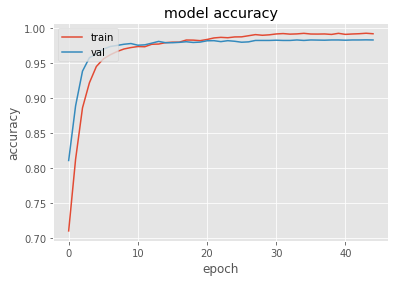

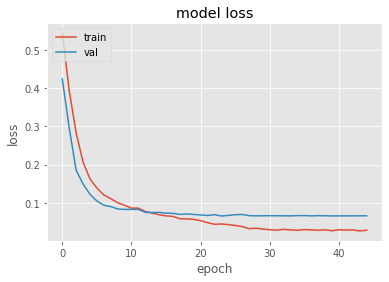

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# list all data in history
print(history.attention.keys())

plt.title('Attention')

# summarize history for accuracy
plt.plot(history.attention['accuracy'])
plt.plot(history.attention['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.attention['loss'])
plt.plot(history.attention['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation of results

In [ ]:
# Convolutional
cscore = model1.evaluate(x_test, y_test)

# LSTM
lscore = model1.evaluate(x_test, y_test)

# GRU
gscore = model1.evaluate(x_test, y_test)

# Attention
ascore = model1.evaluate(x_test, y_test)

# Predict w/ test data 

In [63]:
yhat1 = model1.predict(te_data, verbose=0)

yhat2 = model2.predict(te_data, verbose=0)

yhat3 = model3.predict(te_data, verbose=0)

yhat4 = model4.predict(te_data, verbose=0)

avg = (yhat1+yhat2+yhat3+yhat4) / 4

preds_labels = [[1 if x > 0.5 else 0 for idx,x in enumerate(i) ] for i in avg]

In [67]:
col = ['outwear', 'top', 'trousers', 'women dresses', 'women skirts']

# Output to csv file

In [68]:
id_df = test
#del id_df['word_representation']

id_df

,id,word_representation
0,0,w373517 w383437 w374393 w87179 w289496 w327385 w388432 w115724 w36882 w290531 w311583 w7718 w49235 w193067
1,1,w237465 w167111 w279437 w194870 w351537 w175602 w209059 w118125 w120979 w150520 w59496 w34893 w189307 w144920 w187552 w239430 w162756 w255783 w342007
2,2,w151648 w93366 w121255 w193800 w71240 w48576 w309353 w399113 w34893 w500013 w135431 w238625 w115724 w314686 w248379 w395589 w256897 w500012 w168417 w366647
3,3,w182664 w317736 w33852 w111248 w45374 w209361 w97882 w1867 w120979 w66980 w373517 w500070 w217871 w195317 w95358 w186076 w39222 w381413 w186076 w185000 w372126 w19054 w234583 w85858 w241910
4,4,w206647 w236725 w99560 w338476 w75409 w36882 w204762 w101681 w203093 w162025 w371640 w391937 w371076 w186076 w84933 w35857 w303336 w7718 w373782 w47554 w332345
...,...,...
2455,2455,w104709 w384021 w277040 w365489 w500187 w250138 w254429 w19283 w207614 w293558 w16587 w113361 w7718 w359330 w314686 w236725 w238507
2456,2456,w195317 w102200 w381413 w34893 w183695 w69002 w362009 w105773 w326377 w232128 w395350 w17904 w26791 w34893 w101681 w359330 w342007 w388086 w268930 w202056 w22890 w241910
2457,2457,w373517 w347736 w159941 w34893 w39218 w223408 w282140 w193800 w392167 w45765 w93366 w34893 w111248 w14408 w96683 w314686
2458,2458,w207614 w194000 w390708 w322224 w70969 w311583 w34893 w70597 w317814 w22890 w1867 w120979 w207614 w751 w386149 w20297 w68193 w500060


In [69]:
pred_df = pd.DataFrame(preds_labels, columns=col)
pred_df.index.name='id'

In [70]:
#pred_df.index.rename('id')

pred_df

,outwear,top,trousers,women dresses,women skirts
id,,,,,
0,0,1,1,0,0
1,1,1,0,0,0
2,1,0,1,0,0
3,0,1,1,0,0
4,0,1,1,0,0
...,...,...,...,...,...
2455,0,0,1,1,0
2456,1,0,1,0,0
2457,1,0,1,0,0


In [71]:
pred_df.to_csv('submission.csv')